In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [407]:
df = pd.read_csv('data.csv',index_col=0)
df['gross'] = (df['gross']/1000000).astype('int')
df['rating'] = (df['rating']*10).astype('int')
df['budget'] = df['budget']/1000000

In [408]:
df.dropna(how='any',inplace=True)
df.info()
df = df.reindex(np.random.permutation(df.index))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 661 entries, 0 to 997
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           661 non-null    object 
 1   genre           661 non-null    object 
 2   duration        661 non-null    int64  
 3   rating          661 non-null    int32  
 4   year            661 non-null    int64  
 5   director        661 non-null    object 
 6   major cast      661 non-null    object 
 7   2nd major cast  661 non-null    object 
 8   certification   661 non-null    object 
 9   gross           661 non-null    int32  
 10  votes           661 non-null    int64  
 11  link            661 non-null    object 
 12  budget          661 non-null    float64
dtypes: float64(1), int32(2), int64(3), object(7)
memory usage: 67.1+ KB


In [415]:
x = pd.DataFrame(df.iloc[:,[2,9,10,12]].values)
y = df.iloc[:,3].values

In [417]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in x.columns:
    x[i] = le.fit_transform(x[i])

y = le.fit_transform(y)

In [384]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [1])], remainder='passthrough')
x = pd.DataFrame(ct.fit_transform(x))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


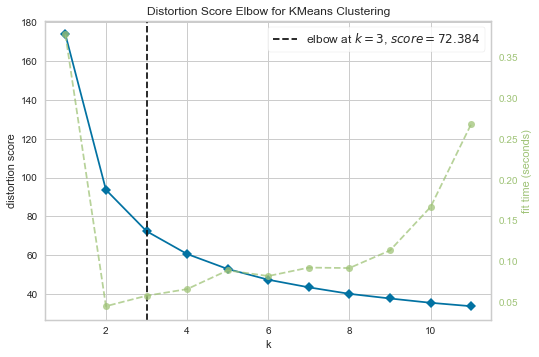

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [454]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(x)
visualizer.show()

In [419]:
cols = x.columns

In [420]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x = ms.fit_transform(x)

In [421]:
X = pd.DataFrame(x, columns=[cols])
X.values

array([[0.3852459 , 0.24651163, 0.09242424, 0.48518519],
       [0.31147541, 0.73023256, 0.78181818, 0.9       ],
       [0.2295082 , 0.1627907 , 0.10151515, 0.47407407],
       ...,
       [0.68852459, 0.20465116, 0.43787879, 0.37407407],
       [0.36885246, 0.08372093, 0.2530303 , 0.68888889],
       [0.19672131, 0.        , 0.74090909, 0.37407407]])

In [520]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=1234).fit(x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

[1 0 1 1 0 1 2 1 1 1 2 2 2 1 1 0 1 0 1 1 0 1 1 2 2 0 1 1 1 1 2 2 1 0 0 1 2
 1 2 2 1 1 0 2 2 0 1 2 2 2 2 1 2 1 1 1 1 2 2 2 1 1 2 0 1 1 1 1 1 2 2 2 2 1
 1 1 2 2 2 1 0 0 0 1 1 2 1 0 2 2 1 2 2 0 0 1 2 2 2 1 0 2 2 2 1 0 2 1 1 2 0
 1 0 2 1 2 2 1 0 1 2 1 0 2 1 1 1 2 0 1 1 0 2 0 0 0 2 2 1 0 1 0 2 0 2 0 1 1
 1 1 2 0 1 0 1 1 2 1 2 1 0 1 0 2 0 1 1 2 0 2 2 0 2 1 1 2 1 1 0 2 2 1 1 0 2
 0 2 0 0 1 2 2 1 0 0 1 1 0 1 2 2 1 2 1 0 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 2 0
 1 2 2 1 2 2 2 2 0 1 2 0 2 2 1 1 0 1 1 0 1 0 2 2 1 2 1 2 2 1 2 0 1 0 0 2 0
 2 1 2 1 2 2 1 2 2 0 0 1 1 1 2 1 1 1 1 1 0 2 2 1 2 2 1 1 1 2 1 1 1 2 1 1 0
 1 1 0 1 0 2 1 2 2 1 1 0 0 2 0 1 1 1 1 2 1 1 1 0 2 0 0 1 1 2 1 2 2 0 0 2 0
 1 2 1 2 2 2 1 2 2 2 1 2 0 2 1 2 0 0 0 1 2 2 2 1 1 0 1 1 1 0 1 2 0 0 0 1 0
 0 2 2 2 1 1 1 2 2 1 2 1 2 1 1 2 2 1 2 0 0 2 1 2 0 1 1 2 0 0 2 1 2 2 1 1 2
 2 1 2 1 2 2 1 0 2 0 1 1 2 2 2 0 0 0 2 2 0 1 0 0 0 0 1 2 1 1 0 2 1 1 1 1 2
 2 0 0 2 0 0 2 1 1 2 2 0 1 2 2 2 0 2 1 2 2 2 1 1 1 2 2 2 1 0 2 1 2 0 0 1 2
 2 1 1 2 2 1 1 2 1 2 1 0 

In [521]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 260, 0: 152, 2: 249})

In [522]:
#sns.pairplot(pd.DataFrame(kmeans.cluster_centers_))

In [523]:
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels,y.size))

Result: 114 out of 661 samples were correctly labeled.


In [519]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_train.size)))

Accuracy score: 0.23


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


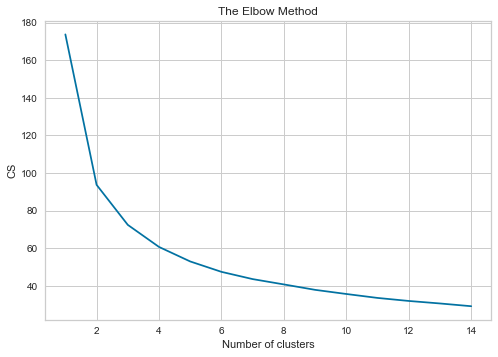

In [459]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [462]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=1234,shuffle=True)

In [463]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.1566265060240964


In [226]:
clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([81, 78, 81, 77, 86, 81, 77, 80, 77, 79, 77, 80, 76, 77, 76, 79, 79,
       76, 77, 83, 78, 77, 83, 81, 77, 80, 77, 78, 77, 81, 80, 79, 86, 80,
       77, 88, 77, 78, 78, 77, 77, 79, 81, 80, 83, 77, 78, 82, 86, 77, 77,
       80, 77, 77, 77, 78, 76, 79, 77, 78, 80, 76, 79, 83, 77, 79, 77, 79,
       81, 77, 78, 77, 78, 79, 77, 80, 79, 78, 79, 81, 77, 81, 80, 77, 79,
       78, 83, 81, 81, 84, 78, 77, 77, 80, 86, 81, 83, 79, 78, 76, 79, 77,
       80, 76, 77, 81, 85, 81, 85, 77, 78, 78, 80, 78, 78, 78, 78, 77, 78,
       80, 81, 83, 81, 81, 78, 79, 80, 79, 76, 81, 78, 78, 85, 77, 83, 78,
       80, 84, 79, 80, 81, 80, 81, 78, 83, 80, 80, 77, 80, 77, 78, 78, 82,
       85, 79, 76, 78, 78, 80, 78, 76, 80, 79, 83, 78, 78, 83, 80, 78, 77,
       78, 78, 84, 84, 78, 77, 78, 85, 85, 79, 81, 83, 82, 85, 79, 83, 79,
       79, 80, 79, 85, 78, 88, 81, 78, 77, 79, 77, 78])

# PCA STARTS HERE


In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=12345,shuffle=True)

In [376]:
from sklearn.preprocessing import StandardScaler as SS  
SC = SS()  
   
X_train = SC.fit_transform(X_train)  
X_test = SC.transform(X_test)  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [377]:
from sklearn.linear_model import LogisticRegression as LR  
   
classifier_1 = LR (random_state = 0)  
classifier_1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [378]:
Y_pred = classifier_1.predict(X_test)  

In [379]:
from sklearn.metrics import accuracy_score
   
print(accuracy_score(y_test,Y_pred))

0.1708542713567839
